In [1]:
%matplotlib inline

# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from matplotlib import rcParams
#rcParams.update({'figure.autolayout': True})

In [2]:
# read csv into DF
df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [4]:
# Identify incomplete rows
df.count()

id                                48895
name                              48879
host_id                           48895
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

In [5]:
# Drop all rows with missing information
df = df.dropna(how='any')
df.count()

id                                38821
name                              38821
host_id                           38821
host_name                         38821
neighbourhood_group               38821
neighbourhood                     38821
latitude                          38821
longitude                         38821
room_type                         38821
price                             38821
minimum_nights                    38821
number_of_reviews                 38821
last_review                       38821
reviews_per_month                 38821
calculated_host_listings_count    38821
availability_365                  38821
dtype: int64

In [6]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

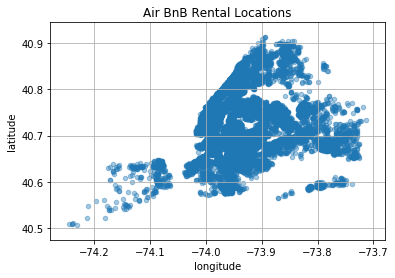

In [7]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)
plt.title("Air BnB Rental Locations")
plt.grid()

plt.show()

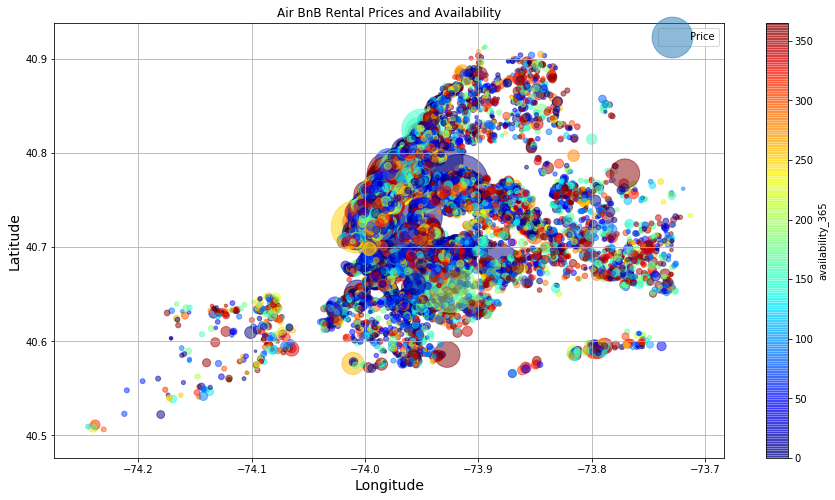

In [8]:
fig, ax = plt.subplots()

df.plot(kind="scatter", x="longitude", y="latitude",
    s=df['price']/3, label="Price",
    c="availability_365", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.5,figsize=(15,8),ax=ax)

plt.xlabel("Longitude",fontsize=14)
plt.ylabel("Latitude",fontsize=14)
plt.title("Air BnB Rental Prices and Availability")
plt.grid()

plt.savefig("scatter_Prices_Availability.png")

plt.show()

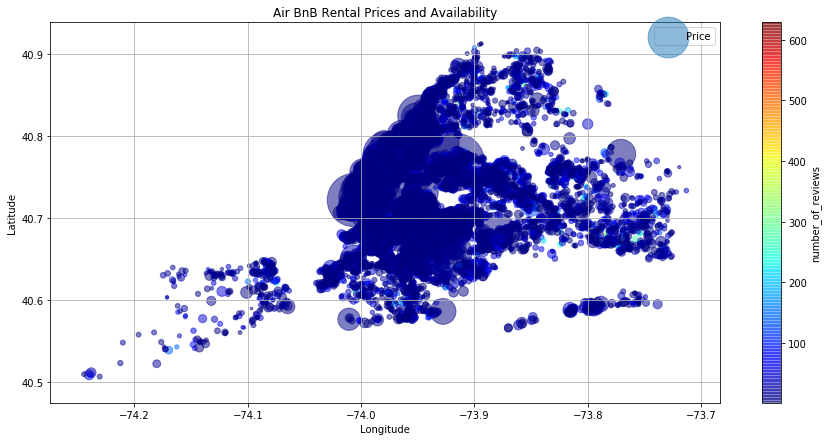

In [9]:
fig, ax = plt.subplots()

df.plot(kind="scatter", x="longitude", y="latitude",
    s=df['price']/3, label="Price",
    c="number_of_reviews", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.5, figsize=(15,7), ax=ax)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Air BnB Rental Prices and Availability")
plt.grid()

In [10]:
df.loc[df["number_of_reviews"] <= 100].count()

id                                35829
name                              35829
host_id                           35829
host_name                         35829
neighbourhood_group               35829
neighbourhood                     35829
latitude                          35829
longitude                         35829
room_type                         35829
price                             35829
minimum_nights                    35829
number_of_reviews                 35829
last_review                       35829
reviews_per_month                 35829
calculated_host_listings_count    35829
availability_365                  35829
dtype: int64

In [11]:
df["number_of_reviews"].count()

38821

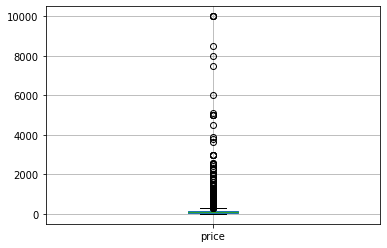

In [12]:
boxplot = df.boxplot(column = ['price'])

In [13]:
#count outliers
df.loc[df["price"] >= 4000].count()

id                                15
name                              15
host_id                           15
host_name                         15
neighbourhood_group               15
neighbourhood                     15
latitude                          15
longitude                         15
room_type                         15
price                             15
minimum_nights                    15
number_of_reviews                 15
last_review                       15
reviews_per_month                 15
calculated_host_listings_count    15
availability_365                  15
dtype: int64

In [14]:
## define new df to exclude outliers
boxplot_df = df.loc[df["price"] <= 4000]

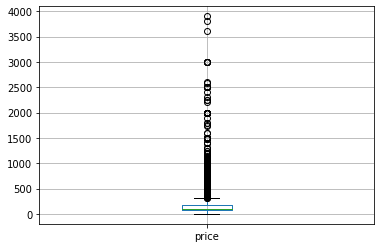

In [15]:
boxplot = boxplot_df.boxplot(column = ['price'])

In [16]:
# Remove unrealistic rental price values
df = df.loc[(df["price"] <= 4000)]
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [17]:
### create a special stats df
stats_df = df.describe()
del stats_df['id']
del stats_df['host_id']
del stats_df['latitude']
del stats_df['longitude']
stats_df
###

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,38806.000000,38806.000000,38806.000000,38806.000000,38806.000000,38806.000000
mean,139.692135,5.863810,29.299670,1.373523,5.167629,114.857960
std,137.716214,17.378368,48.189758,1.680328,26.307904,129.510043
min,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3900.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [18]:
#count outliers
df.loc[df["price"] <= 10].count()

id                                22
name                              22
host_id                           22
host_name                         22
neighbourhood_group               22
neighbourhood                     22
latitude                          22
longitude                         22
room_type                         22
price                             22
minimum_nights                    22
number_of_reviews                 22
last_review                       22
reviews_per_month                 22
calculated_host_listings_count    22
availability_365                  22
dtype: int64

In [19]:
## Redefine df excluding unreasonable prices/per night and listing with 0 nights of availability
df = df.loc[(df["price"] > 10) & (df["availability_365"] >= 1)]
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220


In [20]:
# Check values in 'room_type' column
room_type_list = df['room_type'].value_counts()
room_type_list

Entire home/apt    13691
Private room       11768
Shared room          663
Name: room_type, dtype: int64

In [21]:
room_type_list.index.tolist()

['Entire home/apt', 'Private room', 'Shared room']

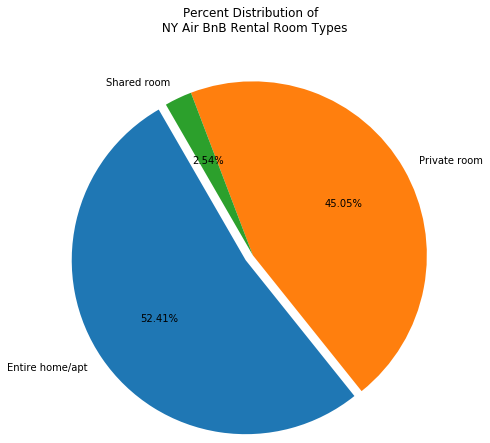

In [22]:
# Create a pie chart depicting the percent distribution of room types in the NY area
p_label = room_type_list.index.tolist()
explode_list = [0.1, 0, 0]

plt.pie(room_type_list, 
            radius = 2, 
            labels = p_label,
            explode = explode_list,
            autopct = '%.2f%%',
            startangle = 120)

plt.title("Percent Distribution of \n NY Air BnB Rental Room Types", y=1.5)

plt.show()

In [23]:
neighbourhood_list = df['neighbourhood'].value_counts()
neighbourhood_list

Bedford-Stuyvesant           2207
Williamsburg                 1785
Harlem                       1506
Bushwick                     1214
Hell's Kitchen               1191
Upper East Side               896
Upper West Side               857
East Village                  814
Crown Heights                 796
Midtown                       697
East Harlem                   650
Chelsea                       532
Greenpoint                    489
Astoria                       469
Washington Heights            467
Lower East Side               452
Financial District            397
East Flatbush                 368
West Village                  353
Flushing                      322
Flatbush                      313
Prospect-Lefferts Gardens     290
Long Island City              290
Clinton Hill                  289
Park Slope                    255
Fort Greene                   244
Murray Hill                   238
Sunset Park                   211
Ridgewood                     211
Sunnyside     

In [24]:
# Down Size to top 10
top10_neighbourhood_list = neighbourhood_list[0:10]

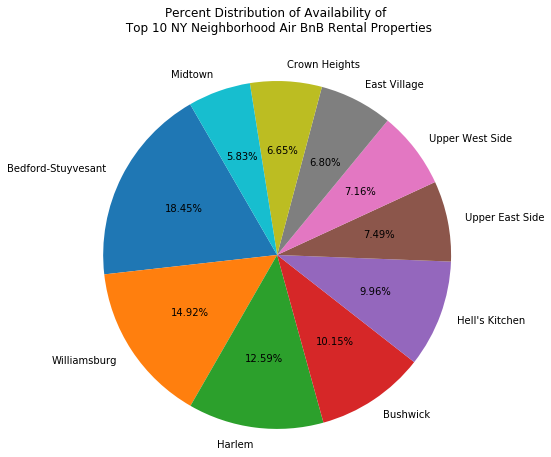

In [25]:
# Create a pie chart depicting the percent distribution of room types in the NY area
pi_label = top10_neighbourhood_list.index.tolist()

plt.pie(top10_neighbourhood_list, 
            radius = 2, 
            labels = pi_label,
            autopct = '%.2f%%',
            startangle = 120)

plt.title("Percent Distribution of Availability of \n Top 10 NY Neighborhood Air BnB Rental Properties", y=1.5)

plt.show()

In [26]:
#Create dataframe with the number of rental properties in each neighbourhood group
df_groupby_neighborhood = df.groupby(["neighbourhood_group"]).count()

df_groupby_neighborhood

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,,,,,,
Bronx,754,754,754,754,754,754,754,754,754,754,754,754,754,754,754
Brooklyn,10647,10647,10647,10647,10647,10647,10647,10647,10647,10647,10647,10647,10647,10647,10647
Manhattan,10803,10803,10803,10803,10803,10803,10803,10803,10803,10803,10803,10803,10803,10803,10803
Queens,3631,3631,3631,3631,3631,3631,3631,3631,3631,3631,3631,3631,3631,3631,3631
Staten Island,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287


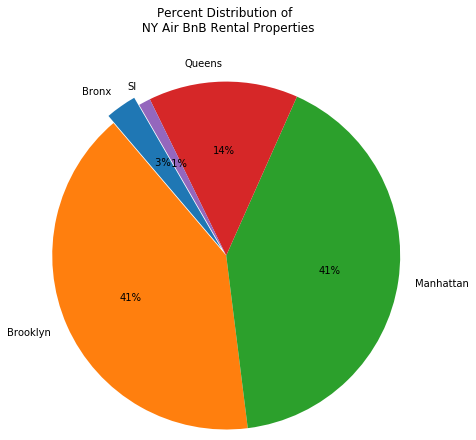

In [27]:
# Create a pie chart depicting the number of rental properties in each neighbourhood group
pie_label = df_groupby_neighborhood.index.tolist()
pie_label[4] = "SI"
explode_list = [0.1, 0,
                0, 0, 0]

plt.pie(df_groupby_neighborhood["name"], 
            radius = 2, 
            labels = pie_label,
            explode = explode_list,
            autopct = '%2.f%%',
            startangle = 120)

plt.title("Percent Distribution of \n NY Air BnB Rental Properties", y=1.5)

plt.show()

In [28]:
dfgroupby_stats_df = df.groupby(["neighbourhood_group","room_type"]).describe()
del dfgroupby_stats_df['id']
del dfgroupby_stats_df['host_id']
del dfgroupby_stats_df['latitude']
del dfgroupby_stats_df['longitude']
dfgroupby_stats_df.to_csv("stats.csv")
dfgroupby_stats_df.head()

price                                \
                                      count        mean         std   min   
neighbourhood_group room_type                                               
Bronx               Entire home/apt   272.0  122.014706   78.331728  35.0   
                    Private room      445.0   57.357303   25.248771  22.0   
                    Shared room        37.0   58.648649  127.636031  20.0   
Brooklyn            Entire home/apt  5418.0  176.716870  123.996218  11.0   
                    Private room     5006.0   75.041950   52.825612  20.0   

                                                                   \
                                       25%    50%     75%     max   
neighbourhood_group room_type                                       
Bronx               Entire home/apt   80.0  100.0  132.75   670.0   
                    Private room      40.0   50.0   68.00   300.0   
                    Shared room       28.0   28.0   49.00   800.0   
Brooklyn            Entire home/apt  110.0  150.0  200.00  2500.0   
                    Private room      50.0   65.0   85.00  1100.0   

                                    minimum_nights            ...  \
                                             count      mean  ...   
neighbourhood_group room_type                                 ...   
Bronx               Entire home/apt          272.0  5.963235  ...   
                    Private room             445.0  3.256180  ...   
                    Shared room               37.0  2.216216  ...   
Brooklyn            Entire home/apt         5418.0  6.444998  ...   
                    Private room            5006.0  5.198362  ...   

                                    calculated_host_listings_count         \
                                                               75%    max   
neighbourhood_group room_type                                               
Bronx               Entire home/apt                            2.0   13.0   
                    Private room                               3.0   13.0   
                    Shared room                                7.0   13.0   
Brooklyn            Entire home/apt                            2.0   87.0   
                    Private room                               3.0  103.0   

                                    availability_365                          \
                                               count        mean         std   
neighbourhood_group room_type                                                  
Bronx               Entire home/apt            272.0  191.202206  124.354865   
                    Private room               445.0  204.175281  124.600626   
                    Shared room                 37.0  181.783784  135.483524   
Brooklyn            Entire home/apt           5418.0  153.850867  119.493109   
                    Private room              5006.0  170.675390  126.340747   

                                                                      
                                     min    25%    50%    75%    max  
neighbourhood_group room_type                                         
Bronx               Entire home/apt  1.0  74.75  178.5  319.5  365.0  
                    Private room     1.0  81.00  188.0  332.0  365.0  
                    Shared room      5.0  73.00  139.0  340.0  365.0  
Brooklyn            Entire home/apt  1.0  37.00  137.0  264.0  365.0  
                    Private room     1.0  55.00  154.0  304.0  365.0  

[5 rows x 48 columns]

In [29]:
# group dataframe by neighbourhood group and by room type, and then calculate the mean on all numerical columns
dfgroupby = df.groupby(["neighbourhood_group","room_type"]).mean()
#dfgroupby_roomtype = df.groupby['room_type']
#dfgroupby_roomtype = da

In [30]:
dfgroupby = dfgroupby.reset_index()
dfgroupby

,neighbourhood_group,room_type,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Bronx,Entire home/apt,2.212075e+07,1.069353e+08,40.849435,-73.877136,122.014706,5.963235,41.073529,2.446213,1.926471,191.202206
1,Bronx,Private room,2.122074e+07,1.004920e+08,40.848180,-73.885162,57.357303,3.256180,33.532584,1.787820,2.408989,204.175281
2,Bronx,Shared room,2.640847e+07,1.002173e+08,40.837884,-73.897824,58.648649,2.216216,10.702703,1.469459,4.270270,181.783784
3,Brooklyn,Entire home/apt,1.750508e+07,5.603441e+07,40.683144,-73.953172,176.716870,6.444998,43.974714,1.773503,2.147287,153.850867
4,Brooklyn,Private room,1.946293e+07,7.005359e+07,40.681926,-73.945987,75.041950,5.198362,36.265881,1.713847,3.133440,170.675390
5,Brooklyn,Shared room,2.276169e+07,1.090946e+08,40.668428,-73.946654,44.991031,6.304933,21.251121,1.209596,7.466368,222.228700
6,Manhattan,Entire home/apt,1.907381e+07,7.281863e+07,40.758341,-73.978215,246.474862,10.454629,30.760883,1.533216,18.342888,169.309473
7,Manhattan,Private room,1.894477e+07,7.264178e+07,40.778812,-73.967195,112.242273,5.231057,45.513460,1.979604,4.206132,164.116401
8,Manhattan,Shared room,2.311741e+07,1.211451e+08,40.772411,-73.971566,75.404494,3.516854,32.838951,2.172846,4.539326,197.674157
9,Queens,Entire home/apt,2.135933e+07,9.491134e+07,40.724207,-73.863791,145.374814,4.608048,42.090909,2.393867,1.852459,180.497019


In [31]:
#create seperate data frames by sorting on each seperate neighbourhood group
bronx = dfgroupby[dfgroupby["neighbourhood_group"]=="Bronx"]
Brooklyn = dfgroupby[dfgroupby["neighbourhood_group"]=="Brooklyn"]
Manhattan = dfgroupby[dfgroupby["neighbourhood_group"]=="Manhattan"]
Queens = dfgroupby[dfgroupby["neighbourhood_group"]=="Queens"]
Staten_Island = dfgroupby[dfgroupby["neighbourhood_group"]=="Staten Island"]

In [32]:
Manhattan

,neighbourhood_group,room_type,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
6,Manhattan,Entire home/apt,1.907381e+07,7.281863e+07,40.758341,-73.978215,246.474862,10.454629,30.760883,1.533216,18.342888,169.309473
7,Manhattan,Private room,1.894477e+07,7.264178e+07,40.778812,-73.967195,112.242273,5.231057,45.513460,1.979604,4.206132,164.116401
8,Manhattan,Shared room,2.311741e+07,1.211451e+08,40.772411,-73.971566,75.404494,3.516854,32.838951,2.172846,4.539326,197.674157


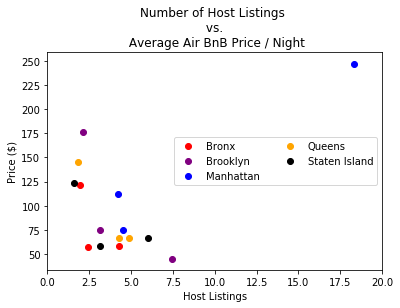

In [33]:
bronx_map = plt.scatter(bronx["calculated_host_listings_count"],bronx["price"], color = "red")
brooklyn_map = plt.scatter(Brooklyn["calculated_host_listings_count"],Brooklyn["price"], color = "purple")
Manhattan_map = plt.scatter(Manhattan["calculated_host_listings_count"],Manhattan["price"], color = "blue")
Queens_map = plt.scatter(Queens["calculated_host_listings_count"],Queens["price"], color = "orange")
Staten_Island_map = plt.scatter(Staten_Island["calculated_host_listings_count"],Staten_Island["price"], color = "black")

plt.xlim(0,20)
plt.xlabel("Host Listings")
plt.ylabel("Price ($)")
plt.title("Number of Host Listings \n vs. \n Average Air BnB Price / Night")

plt.legend((bronx_map, brooklyn_map, Manhattan_map,Queens_map,Staten_Island_map),
            ("Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"),
           scatterpoints = 1,
           loc="center right",
           ncol=2,
           fontsize =10)

plt.show()

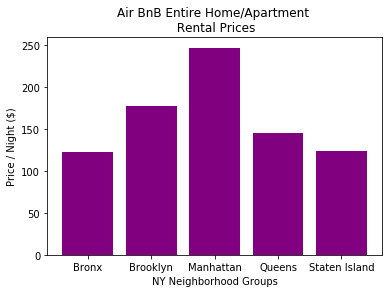

In [34]:
## 10-7-19
### This bar graph shows the average Air BnB price / night for renting an entire home/aprtment in the NY area

plt.bar("Bronx" , bronx.loc[bronx["room_type"] == "Entire home/apt", "price"], color = "purple")  # value of 127.506596
plt.bar("Brooklyn", Brooklyn.loc[Brooklyn["room_type"] == "Entire home/apt", "price"], color = "purple")
plt.bar("Manhattan", Manhattan.loc[Manhattan["room_type"] == "Entire home/apt", "price"], color = "purple")
plt.bar("Queens", Queens.loc[Queens["room_type"] == "Entire home/apt", "price"], color = "purple")
plt.bar("Staten Island", Staten_Island.loc[Staten_Island["room_type"] == "Entire home/apt", "price"], color = "purple")

plt.xlabel("NY Neighborhood Groups")
plt.ylabel("Price / Night ($)")

plt.title("Air BnB Entire Home/Apartment \n Rental Prices")

plt.show()

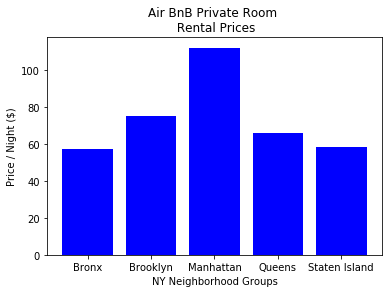

In [35]:
## 10-7-19
### This bar graph shows the average Air BnB price / night for renting a Private room in the NY area

plt.bar("Bronx" , bronx.loc[bronx["room_type"] == "Private room", "price"], color = "blue")
plt.bar("Brooklyn", Brooklyn.loc[Brooklyn["room_type"] == "Private room", "price"], color = "blue")
plt.bar("Manhattan", Manhattan.loc[Manhattan["room_type"] == "Private room", "price"], color = "blue")
plt.bar("Queens", Queens.loc[Queens["room_type"] == "Private room", "price"], color = "blue")
plt.bar("Staten Island", Staten_Island.loc[Staten_Island["room_type"] == "Private room", "price"], color = "blue")

plt.xlabel("NY Neighborhood Groups")
plt.ylabel("Price / Night ($)")

plt.title("Air BnB Private Room \n Rental Prices")

plt.show()

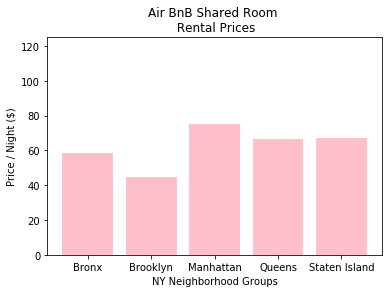

In [36]:
## 10-7-19
### This bar graph shows the average Air BnB price / night for renting a Shared room in the NY area

plt.bar("Bronx" , bronx.loc[bronx["room_type"] == "Shared room", "price"], color = "pink")  # value of 127.506596
plt.bar("Brooklyn", Brooklyn.loc[Brooklyn["room_type"] == "Shared room", "price"], color = "pink")
plt.bar("Manhattan", Manhattan.loc[Manhattan["room_type"] == "Shared room", "price"], color = "pink")
plt.bar("Queens", Queens.loc[Queens["room_type"] == "Shared room", "price"], color = "pink")
plt.bar("Staten Island", Staten_Island.loc[Staten_Island["room_type"] == "Shared room", "price"], color = "pink")

plt.xlabel("NY Neighborhood Groups")
plt.ylabel("Price / Night ($)")
plt.ylim(0,125)

plt.title("Air BnB Shared Room \n Rental Prices")

plt.show()

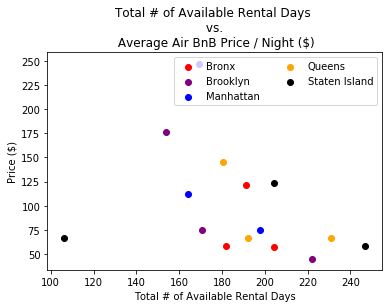

In [37]:
bronx_map = plt.scatter(bronx["availability_365"],bronx["price"], color = "red")
brooklyn_map = plt.scatter(Brooklyn["availability_365"],Brooklyn["price"], color = "purple")
Manhattan_map = plt.scatter(Manhattan["availability_365"],Manhattan["price"], color = "blue")
Queens_map = plt.scatter(Queens["availability_365"],Queens["price"], color = "orange")
Staten_Island_map = plt.scatter(Staten_Island["availability_365"],Staten_Island["price"], color = "black")
plt.xlabel("Total # of Available Rental Days")
plt.ylabel("Price ($)")


plt.title("Total # of Available Rental Days \n vs. \n Average Air BnB Price / Night ($)")

plt.legend((bronx_map, brooklyn_map, Manhattan_map,Queens_map,Staten_Island_map),
            ("Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"),
           scatterpoints = 1,
           loc="upper right",
           ncol=2,
           fontsize =10)

plt.show()
#z = np.polyfit(bronx["availability_365"], bronx["price"], 1)
#p = np.poly1d(z)
#plt.plot(bronx["availability_365"],p(bronx["availability_365"]),"r--")

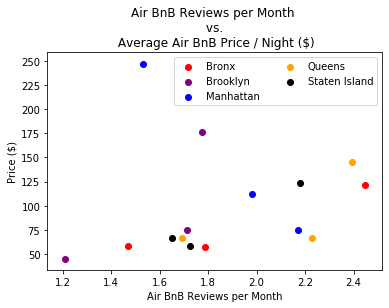

In [38]:
bronx_map = plt.scatter(bronx["reviews_per_month"],bronx["price"], color = "red")
brooklyn_map = plt.scatter(Brooklyn["reviews_per_month"],Brooklyn["price"], color = "purple")
Manhattan_map = plt.scatter(Manhattan["reviews_per_month"],Manhattan["price"], color = "blue")
Queens_map = plt.scatter(Queens["reviews_per_month"],Queens["price"], color = "orange")
Staten_Island_map = plt.scatter(Staten_Island["reviews_per_month"], Staten_Island["price"], color = "black")
plt.legend((bronx_map, brooklyn_map, Manhattan_map,Queens_map,Staten_Island_map),
            ("Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"),
           scatterpoints = 1,
           loc="upper right",
           ncol=2,
           fontsize =10)
plt.xlabel("Air BnB Reviews per Month")
plt.ylabel("Price ($)")

plt.title("Air BnB Reviews per Month \n vs. \n Average Air BnB Price / Night ($)")

plt.show()